In [1]:
#Conda env: base_conda
#Import packages
#---------------------------------------
import sys
from matplotlib import pyplot as plt
import numpy as np
import json
import pandas as pd
import seaborn as sns
import imblearn


#Import your modules
#---------------------------------------
import plaque_f as pf

# Define paths
#----------------------------------------------------------------------
l_code = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
l_data = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
l_fig = '/Users/dominicburrows/Dropbox/PhD/figures/'

s_code = '/cndd3/dburrows/CODE/'
s_data = '/cndd3/dburrows/DATA/'
s_fig = '/cndd3/dburrows/FIGS/'

%load_ext autoreload
sys.version

'3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:23:11) \n[GCC 9.4.0]'

# Load and pre-process data

In [2]:
#Load data
meta = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/prediction/meta.csv')
cpm = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/prediction/combined_genemat_CPM.csv', index_col=0)
logcpm = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/prediction/combined_genemat_log2p1CPM.csv', index_col=0)
de_genes = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/prediction/adjplq_MAST-LRT_sample-intercept_reduced.csv', index_col=0)


In [3]:
#Ascertain class imbalance
u = np.unique(meta['adj_plq'],return_counts=True)
print(str(np.round(u[1][1]/sum(u[1]) * 100)) + '% of spots are plaque')

16.0% of spots are plaque


In [4]:
def run_(age, dist, long_name, short_name):
    # Declare paths
    data_path = s_data + 'spatial_transcriptomics/plaques/coords/' + age + '/' + long_name + '.json'
    coord_path = '/cndd2/agelber/hal/qc_aligned/' + short_name + '/outs/spatial/tissue_positions.csv'
    genes_path = '/cndd2/agelber/hal/qc_aligned/' + short_name + '/outs/filtered_feature_bc_matrix.h5'
    scale_path = '/cndd2/agelber/hal/qc_aligned/' + short_name + '/outs/spatial/scalefactors_json.json'
    meta = pd.read_csv('/home/AD/agelber/desp1/precast/prec_c25q25g3000/qc_cell_annotation.csv')
    meta_filt = meta[meta['sample'] == short_name]


    spot_df, gene_df = pf.sort_data(data_path, coord_path, genes_path, scale_path, 
                                    meta_filt, min_cell_per_gene=0)#, norm_factor=1e6)
    
    spot_df = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/metadata/' + age + '/' + short_name + '.csv')
    #turn boolean into int
    bool = (spot_df['dist_nearest_plaq'].values < dist).astype(int)
    spot_df['adj_plq'] = bool
    
    #Sanity check
    assert spot_df.shape[0] == gene_df.shape[0] == meta_filt.shape[0]
    assert 'Thy1' not in gene_df.columns.values or 'humanAPP' not in gene_df.columns.values
    print('Number of spots: ' + str(gene_df.shape[0]))
    print('Number of genes: ' + str(gene_df.shape[1]))
    return(spot_df, gene_df)

In [6]:
#OLD ANIMALS
#sort out names
import glob
import os
age = 'old'
os.chdir('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/coords/' + age)
og = glob.glob('*.json')
ID = [i.split('.')[0] for i in og]
sub_ID=[]
for x,i in enumerate(og):
    if x != 1: sub_ID = np.append(sub_ID, i.split('_')[1][:-5])
    else: sub_ID = np.append(sub_ID, i[:-5])
ID, sub_ID



(['V11Y10_030-C',
  '030-B',
  'V11Y17_109-D',
  'V11Y17_109-A',
  'V10S15_040-C',
  'V11Y17_109-C',
  'S29_030-D',
  'V10S15_040-A',
  'V10S15_040-D'],
 array(['030-C', '030-B', '109-D', '109-A', '040-C', '109-C', '030-D',
        '040-A', '040-D'], dtype='<U32'))

In [49]:
#DIST = 150
dist = 150
spot_df, gene_df = run_('old', dist, ID[0], sub_ID[0])

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3397
Number of genes: 32284


In [50]:
spot_df

,Unnamed: 0,barcode,sample,sex,plaque,cluster,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres,micron_x,micron_y,dist_nearest_plaq,dam_scr,adj_plq
0,111351,AAACAAGTATCTCCCA-1_030-C,030-C,F,0,GP/TH,50,102,413,1642,7640.215638,1921.686394,2813.133952,-1.303905,0
1,111352,AAACAATCTACTAGCA-1_030-C,030-C,F,0,CA1,3,43,1049,764,3554.887179,4880.990380,1155.639155,-0.761353,0
2,111353,AAACAGAGCGACTCCT-1_030-C,030-C,F,0,CA3-sp,14,94,500,969,4508.750885,2326.496845,3335.466323,1.198699,0
3,111354,AAACAGTGTTCCTGGG-1_030-C,030-C,F,0,Cortex Layer 2/3,73,43,1046,2073,9645.655919,4867.031399,361.977789,1.716606,0
4,111355,AAACCCGAACGAAATC-1_030-C,030-C,F,0,Amygdala,45,115,273,1548,7202.834232,1270.267277,3555.739719,0.967294,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3392,114743,TTGTTTCACATCCAGG-1_030-C,030-C,F,0,Cortex Layer 5b,58,42,1057,1793,8342.817685,4918.214330,98.155009,0.898491,1
3393,114744,TTGTTTCATTAGTCTA-1_030-C,030-C,F,0,Cortex Layer 2/3,60,30,1186,1830,8514.978452,5518.450516,97.823590,3.975057,1
3394,114745,TTGTTTCCATACAACT-1_030-C,030-C,F,0,Cortex Layer 4,45,27,1219,1550,7212.140219,5671.999308,705.415942,1.810155,0
3395,114746,TTGTTTGTATTACACG-1_030-C,030-C,F,0,Cortex Layer 2/3,73,41,1067,2073,9645.655919,4964.744267,302.444590,-0.445870,0


In [53]:
#Define colormap by clusters
col_df = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/metadata/colors.csv')
sort_clust = col_df['cluster_order'] #all clusters sorted 
sort_col = col_df['color']


In [4]:
#visualise plaque + adjacent spots
for y,name in enumerate(sub_ID):
    spot_df, gene_df = run_('old', dist, ID[y], sub_ID[y])
    clust_lab = spot_df['cluster'].values
    xcoord, ycoord = spot_df['pxl_row_in_fullres'].values, spot_df['pxl_col_in_fullres'].values
    plq_bool = spot_df['plaque'].values == 1
    adj_bool = spot_df['adj_plq'].values == 1


    fig,ax = plt.subplots(figsize=(10,10))
    for x in range(len(sort_clust)): 
        plt.scatter(xcoord[np.where(clust_lab==sort_clust[x])[0]], ycoord[np.where(clust_lab==sort_clust[x])[0]], s=5, label = sort_clust[x], color = sort_col[x], alpha=1)
    plt.scatter(xcoord[plq_bool], ycoord[plq_bool], s=15, c='k')
    plt.scatter(xcoord[adj_bool], ycoord[adj_bool], s=7, c='r')

    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, markerscale=2)

    #remove all borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.axis('equal')
    plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
    plt.title(sub_ID[y], fontsize=16)
    plt.show()

NameError: name 'sub_ID' is not defined

In [49]:
lab_all

,wellKey,dist_nearest_plaq,sample
0,0,361.977789,030-C
1,1,697.281805,030-C
2,2,98.155009,030-C
3,3,1111.520238,030-C
4,4,970.737604,030-C
...,...,...,...
8312,8312,264.686204,040-D
8313,8313,298.551842,040-D
8314,8314,97.371988,040-D
8315,8315,268.252716,040-D


In [69]:
#stack spot data together for learning, and MAST DE
# Plaque vs no plaque
meta = pd.read_csv('/cndd2/agelber/hal/metadata.csv')
name_l = ID
age='old'
dist=150
drop = [] #genes with < 10 counts in a single sample to drop

#Pull out sex and time for each sample
sex_l = [meta['sex'][meta['sample_name'] == i].values[0] for i in sub_ID]

for x,name in enumerate(name_l):
    name = name_l[x]
    spot_df, gene_df = run_(age, dist, ID[x], sub_ID[x])
    sample = np.full(len(spot_df), sub_ID[x])
    sex = np.full(len(spot_df), sex_l[x])
    spot_df['sample'] = sample
    spot_df['sex'] = sex

    new_df = spot_df[['barcode', 'adj_plq','sample', 'cluster']]
    gene_df.index = gene_df.index.astype(str)+'_'+new_df['sample'].astype(str)
    drop = np.append(drop, gene_df.T[np.sum(gene_df, axis=0) < 10].index.values)
    ind = [i for i in range(len(new_df)) if 'Cortex L' in new_df['cluster'].iloc[i]]
    new_df = new_df.iloc[ind]
    new_df.drop(['cluster'], axis=1, inplace=True)
    gene_df  = gene_df.iloc[ind]

    if name == name_l[0]: 
        gene_all = gene_df
        lab = new_df
    else: 
        gene_all = pd.concat([gene_all, gene_df], axis=0)
        lab = pd.concat([lab, new_df], axis=0)

gene_all = gene_all.T #genes x rows needed for DESEQ
gene_all.drop(np.unique(drop), axis=0, inplace=True)
lab = lab.set_index('barcode')
dm = lab

# make design matrix 
dm.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/prediction/meta.csv')
gene_all.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/prediction/combined_genemat_CPM.csv')

#Log transform CPMs and plus 1 for MAST
gene_mast = np.log2(gene_all+1)
#remove header and index from gene_all
gene_mast.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/prediction/combined_genemat_log2p1CPM.csv')

# Create csv design matrix for MAST -> distance from plaque, donor ID
lab['wellKey'] = lab.index
curr_lab = lab[['wellKey', 'adj_plq', 'sample']]
#drop index from lab_all
curr_lab.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/prediction/design.csv', index=False, header=True)

# Create csv of gene names for MAST
fdata_mast = gene_mast.index.values
#save both as csv
np.savetxt('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/prediction/fdata.csv', fdata_mast, delimiter=',', fmt='%s')


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3397
Number of genes: 32284


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2835
Number of genes: 32284


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2959
Number of genes: 32284


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3204
Number of genes: 32284


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3406
Number of genes: 32284


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3002
Number of genes: 32284


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


Number of spots: 2998
Number of genes: 32284


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3343
Number of genes: 32284


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3285
Number of genes: 32284


In [22]:
de_dict = {'C': pf.extract_p(de_genes, 'C'), 'D': pf.extract_p(de_genes,'D')}
de_dict

{'C':             primerid component contrast  Pr(>Chisq)     ci.hi     ci.lo  \
 1      0610009B22Rik         C  adj_plq    0.280691  0.093800 -0.027195   
 9      0610009L18Rik         C  adj_plq    0.404693  0.116336 -0.046917   
 17     0610010F05Rik         C  adj_plq    0.138595  0.108386 -0.015073   
 25     0610010K14Rik         C  adj_plq    0.930505  0.055678 -0.060864   
 33     0610012G03Rik         C  adj_plq    0.654075  0.040847 -0.065064   
 ...              ...       ...      ...         ...       ...       ...   
 83481         mt-Nd3         C  adj_plq    0.000588  0.089147  0.024411   
 83489         mt-Nd4         C  adj_plq    1.000000  0.038064 -0.014712   
 83497        mt-Nd4l         C  adj_plq    0.759850  0.043638 -0.059769   
 83505         mt-Nd5         C  adj_plq    0.421178  0.022072 -0.052803   
 83513         mt-Nd6         C  adj_plq    0.243664  0.027070 -0.106587   
 
            coef         z     p_val  
 1      0.033302  1.078909  0.280691  
 9 

In [23]:
de_dict['C'].sort_values(by='p_val', ascending=True).head(30)

,primerid,component,contrast,Pr(>Chisq),ci.hi,ci.lo,coef,z,p_val
27249,Gfap,C,adj_plq,5.804494e-25,0.541111,0.369364,0.455237,10.390232,5.804494e-25
49457,Pcp4,C,adj_plq,3.896713e-22,0.531256,0.352873,0.442064,9.714233,3.896713e-22
7713,B2m,C,adj_plq,8.242087e-20,0.321779,0.208126,0.264952,9.138299,8.242087e-20
16753,Ctsd,C,adj_plq,1.338832e-18,0.306774,0.195303,0.251038,8.827895,1.338832e-18
34673,Junb,C,adj_plq,4.497052e-18,-0.270682,-0.427950,-0.349316,-8.706765,4.497052e-18
24641,Fbxl16,C,adj_plq,6.312510e-17,-0.135126,-0.217621,-0.176373,-8.380859,6.312510e-17
57241,Rasgrf2,C,adj_plq,1.579569e-16,-0.250036,-0.405162,-0.327599,-8.278212,1.579569e-16
15697,Cplx1,C,adj_plq,7.477600e-16,0.270681,0.165002,0.217842,8.080379,7.477600e-16
10345,Camk2n2,C,adj_plq,2.993473e-12,-0.152320,-0.270954,-0.211637,-6.992913,2.993473e-12
9697,C1qb,C,adj_plq,3.030453e-12,0.337061,0.189477,0.263269,6.992580,3.030453e-12


In [126]:
de_dict['D'].sort_values(by='p_val', ascending=True).head(30)

,primerid,component,contrast,Pr(>Chisq),ci.hi,ci.lo,coef,z,p_val
9819,C4b,D,adj_plq,1.810956e-21,0.849653,0.561353,0.705503,9.592508,1.810956e-21
16499,Cst7,D,adj_plq,4.971456e-18,0.926235,0.588285,0.757260,8.783557,4.971456e-18
27251,Gfap,D,adj_plq,5.656316e-18,0.816660,0.511012,0.663836,8.513697,5.656316e-18
33091,Igfn1,D,adj_plq,1.709340e-17,-0.625911,-1.035312,-0.830612,-7.952933,1.709340e-17
47115,Ntn5,D,adj_plq,3.485436e-17,-0.510802,-0.838718,-0.674760,-8.066124,3.485436e-17
37035,Lgals3bp,D,adj_plq,1.994183e-16,0.711182,0.438064,0.574623,8.247277,1.994183e-16
63043,Serpina3n,D,adj_plq,2.456443e-15,0.698914,0.423281,0.561097,7.979672,2.456443e-15
32123,Hs3st2,D,adj_plq,1.445283e-14,0.689269,0.405652,0.547461,7.566551,1.445283e-14
28403,Gm765,D,adj_plq,7.016579e-13,-0.559871,-1.026105,-0.792988,-6.667158,7.016579e-13
32803,Ifi27l2a,D,adj_plq,5.182839e-12,0.676374,0.380926,0.528650,7.013975,5.182839e-12


In [ ]:
#Do PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(gene_all)
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

# Build logistic regression classifier



In [7]:
meta

,barcode,adj_plq,sample
0,AAACAGTGTTCCTGGG-1_030-C,0,030-C
1,AAACCGGGTAGGTACC-1_030-C,0,030-C
2,AAACCGTTCGTCCAGG-1_030-C,1,030-C
3,AAACCTCATGAAGTTG-1_030-C,0,030-C
4,AAACGGGTTGGTATCC-1_030-C,0,030-C
...,...,...,...
8312,TTGTTTCACATCCAGG-1_040-D,0,040-D
8313,TTGTTTCATTAGTCTA-1_040-D,0,040-D
8314,TTGTTTCCATACAACT-1_040-D,1,040-D
8315,TTGTTTGTATTACACG-1_040-D,0,040-D


In [3]:
#Find top n DE genes
n=50
de_dict = {'C': pf.extract_p(de_genes, 'C'), 'D': pf.extract_p(de_genes,'D')}
top_de = de_dict['C'].sort_values(by='p_val', ascending=True).head(n)


#Filter CPMmat with DE genes
sub_gm = logcpm.loc[top_de['primerid']].T
sub_gm

,Gfap,Pcp4,B2m,Ctsd,Junb,Fbxl16,Rasgrf2,Cplx1,Camk2n2,C1qb,...,Hrh3,Nptx1,H2-K1,Sncb,Plp1,Nefh,Sub1,Ddn,Ipcef1,Mrtfb
AAACAGTGTTCCTGGG-1_030-C,4.570581,8.320426,7.836803,7.973733,6.114488,9.417553,8.903884,8.903884,7.324932,0.000000,...,4.570581,7.516452,6.524310,8.903884,7.516452,0.000000,9.680236,9.318168,6.843100,7.973733
AAACCGGGTAGGTACC-1_030-C,0.000000,10.917280,8.630672,9.546495,0.000000,9.546495,5.489575,10.102271,8.269141,0.000000,...,5.489575,5.489575,6.473430,9.850983,7.465289,5.489575,8.630672,8.461202,5.489575,0.000000
AAACCGTTCGTCCAGG-1_030-C,0.000000,11.254189,7.966595,9.100948,6.653292,8.642502,0.000000,8.228667,5.667554,5.667554,...,5.667554,8.963708,6.653292,9.100948,8.963708,0.000000,8.812026,9.100948,7.646108,7.233469
AAACCTCATGAAGTTG-1_030-C,0.000000,7.182561,6.452202,7.443940,4.899822,9.175094,8.314638,8.853789,8.554949,5.875454,...,4.899822,7.665148,6.452202,9.312370,8.314638,5.875454,8.661590,8.760888,0.000000,7.182561
AAACGGGTTGGTATCC-1_030-C,5.768532,8.331270,8.331270,7.335743,6.755238,9.066443,5.768532,9.650508,9.329029,0.000000,...,5.768532,7.748546,6.755238,9.830869,9.650508,6.755238,8.331270,8.553022,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTTCACATCCAGG-1_040-D,0.000000,11.172438,7.204348,8.520395,7.204348,8.657541,5.233401,9.196993,5.233401,0.000000,...,0.000000,8.520395,0.000000,9.196993,9.284311,0.000000,8.657541,8.007504,5.233401,6.792568
TTGTTTCATTAGTCTA-1_040-D,0.000000,10.404346,8.509126,8.051179,0.000000,8.955528,5.088758,9.135759,8.634327,6.067404,...,7.376367,6.645178,0.000000,9.632510,7.859310,5.088758,8.634327,9.218079,6.067404,6.645178
TTGTTTCCATACAACT-1_040-D,0.000000,7.711379,7.298635,8.294045,5.731884,9.613213,8.294045,8.515781,6.718247,0.000000,...,5.731884,8.031930,0.000000,9.706207,8.294045,5.731884,9.291745,9.513809,6.718247,7.711379
TTGTTTGTATTACACG-1_040-D,6.258180,10.921775,7.981891,8.465687,5.682611,8.827350,4.710430,9.514200,7.661389,7.469761,...,7.469761,7.248725,4.710430,9.463645,9.411253,4.710430,9.356887,8.118875,5.682611,7.469761


In [17]:
X_train

,Gfap,Pcp4,B2m,Ctsd,Junb,Fbxl16,Rasgrf2,Cplx1,Camk2n2,C1qb,...,Ndfip1,Matr3,Wfs1,Vamp1,Ets2,Rps8,Fkbp1a,Fzd3,Itm2c,Zmiz1
GAACATTAGTATGTTA-1_040-C,4.403467,8.245285,8.245285,8.729353,5.368972,8.796312,7.924545,9.143540,8.245285,5.942251,...,9.620868,8.507527,5.368972,7.151173,5.942251,9.620868,10.035447,4.403467,9.761560,5.368972
GTGATGCACAACATCT-1_040-A,4.758126,7.297962,8.293371,8.794517,4.758126,8.293371,7.297962,9.513133,8.614379,7.036760,...,9.875264,7.036760,5.731220,7.036760,0.000000,10.131354,8.707258,6.307101,9.165748,5.731220
CTCAGCAGACTGCCGA-1_040-C,0.000000,9.356068,7.944694,7.583797,6.782071,9.294763,7.362657,9.093473,8.473407,4.820871,...,10.676674,8.096112,4.820871,4.820871,4.820871,9.770555,9.525748,7.362657,9.163737,4.820871
GACTCCCAGAATAAGG-1_040-C,5.559021,11.572958,7.535885,8.118255,7.123437,9.115656,6.543639,9.530043,7.535885,5.559021,...,10.053011,8.531993,0.000000,7.856258,5.559021,9.988942,9.699751,5.559021,9.699751,5.559021
CATGCCAACTCGCAAA-1_030-C,0.000000,5.867946,8.307023,8.307023,6.855541,9.237738,8.753266,9.931970,7.436345,5.867946,...,9.652178,7.849298,7.174975,8.169975,6.444650,9.488894,9.844599,7.657547,8.753266,6.855541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGACGGGATTGGTATA-1_109-A,0.000000,10.696185,0.000000,0.000000,0.000000,9.375561,7.382062,7.382062,0.000000,7.382062,...,10.374475,8.961246,7.382062,0.000000,7.382062,10.544278,9.697054,7.382062,0.000000,0.000000
CGTGCATTGTCGACGC-1_040-D,0.000000,8.259973,9.394907,6.945087,0.000000,8.259973,7.526141,8.744054,7.526141,5.956748,...,9.520259,8.522222,0.000000,7.526141,0.000000,10.022182,8.522222,5.956748,9.257618,6.945087
TTGAACGAATCCTTTG-1_030-C,0.000000,9.394832,8.910262,6.600278,0.000000,9.047493,0.000000,9.587209,8.396973,0.000000,...,9.908762,7.913257,0.000000,6.600278,6.600278,10.230390,8.758592,6.600278,8.396973,5.615072
GCTAAGTAAAGGCGAT-1_109-C,0.000000,8.498591,7.502574,8.498591,7.502574,0.000000,7.502574,9.082224,8.498591,0.000000,...,9.818124,7.502574,0.000000,0.000000,7.502574,9.818124,7.502574,0.000000,7.502574,7.502574


In [7]:
# classify plaque or no plaque spots based gene expression
#----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics
from sklearn.model_selection import cross_val_score

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(sub_gm, meta['adj_plq'], test_size=0.33)

print(f"Training matrix shape =  {X_train.shape}, Test matrix shape =  {X_test.shape}")
print(f"Training label shape = {y_train.shape}, Test label shape =  {y_test.shape}")

#run CV and take mean of weights across each fold to get best model
model = LogisticRegressionCV(max_iter=1000, solver = 'lbfgs', penalty='l2', cv=5, refit=False) #refit = False takes mean across all weights  
print(model)

Training matrix shape =  (5572, 50), Test matrix shape =  (2745, 50)
Training label shape = (5572,), Test label shape =  (2745,)
LogisticRegressionCV(cv=5, max_iter=1000, refit=False)


In [44]:
#Fit model and predict
model.fit(X_train, y_train) #modifies model in place
pred = model.predict(X_test) 
pred_prob = model.predict_proba(X_test)
true = y_test.values
pf.report_metrics(true, pred, pred_prob)

TOTAL ACCURACY (#correct predictions/#total predictions) = 0.846 , 2323 of 2745
ACCURACY (#correct predictions/#total true non-plaque) non-plaque = 0.986 , 2266 of 2298
ACCURACY (#correct predictions/#total true plaque) plaque = 0.13 , 57 of 447
PRECISION (TP/TP+FP) non-plaque = 0.853
PRECISION (TP/TP+FP) plaque= 0.64
RECALL (TP/TP+FN) Non-plaque = 0.986
RECALL (TP/TP+FN) plaque = 0.128
F1 SCORE (2*(Pre/Pre+Rec)) non-plaque = 0.915
F1 SCORE (2*(Pre/Pre+Rec)) plaque = 0.213
TRUE POSITIVE RATE (TP/TP+FN) non-plaque = 0.986
TRUE POSITIVE RATE (TP/TP+FN) plaque = 0.128
FALSE POSITIVE RATE (FP/FP+TN) non-plaque  = 0.872
FALSE POSITIVE RATE (FP/FP+TN) plaque = 0.014
ROC AUC non-plaque = 0.761
ROC AUC plaque = 0.761


In [8]:
#Get CIs of model performance with CV
pf.model_cvs(LogisticRegression(max_iter=1000, penalty='l2', solver = 'lbfgs'), X_train, y_train, 5)

Accuracy (#correct predictions/#total predictions): 0.851 (+/- 0.005)
[0.84663677 0.85470852 0.85637343 0.8518851  0.84470377]
Plaque precision (TP/TP+FP): 0.596 (+/- 0.046)
[0.54901961 0.63636364 0.65384615 0.6        0.53846154]
Plaque recall (TP/TP+FN): 0.171 (+/- 0.029)
[0.15909091 0.19774011 0.19318182 0.1875     0.11931818]
Plaque f1 (2*(Pre/Pre+Rec)): 0.266 (+/- 0.040)
[0.24669604 0.30172414 0.29824561 0.28571429 0.19534884]
ROC AUC: 0.756 (+/- 0.023)
[0.78407881 0.74719622 0.76742101 0.71601812 0.76775417]


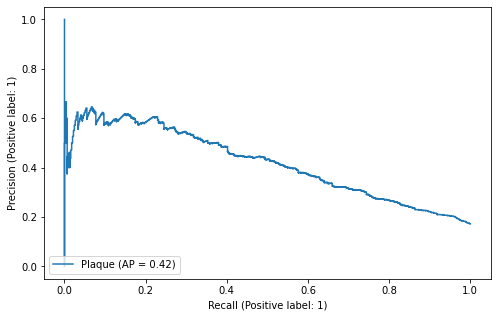

In [202]:
from sklearn.metrics import PrecisionRecallDisplay
fig, ax = plt.subplots(figsize=(8, 5))
PrecisionRecallDisplay.from_estimator(
    model, X_test, y_test, name="Plaque", pos_label=1, ax=ax)
plt.show()

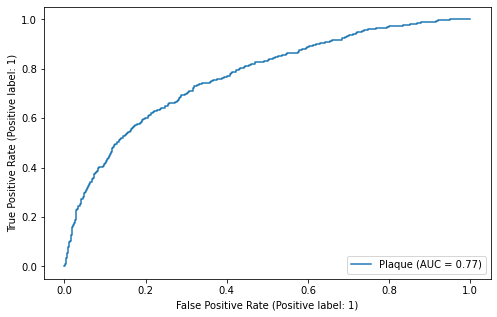

In [203]:
from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots(figsize=(8, 5))
RocCurveDisplay.from_estimator(
    model, X_test, y_test, name="Plaque", pos_label=1, ax=ax)
plt.show()

In [6]:
#Do hyperparameter search

#Define model
model = LogisticRegression(max_iter = 2000, solver='liblinear')
scoring = ('precision', 'recall', 'roc_auc')

#Define grid search parameters
from sklearn.model_selection import GridSearchCV 
parameters = [{'solver': ['liblinear'], 'C': list(np.arange(0.1, 10, 1)),'penalty': ['l1','l2']},
              {'solver': ['lbfgs'], 'C': list(np.arange(0.1, 10, 1)),'penalty': ['l2']},
              {'solver': ['lbfgs'], 'penalty': ['none']}
]

#Define external parameters to loop over
#n DE genes
n_de = np.arange(5,200, 20)
#n PCs
n_pc = (np.geomspace(2, 50, 10).astype(int))[1:]

n_de, n_pc

(array([  5,  25,  45,  65,  85, 105, 125, 145, 165, 185]),
 array([ 2,  4,  5,  8, 11, 17, 24, 34, 50]))

In [7]:
score_df = pd.DataFrame()
model_dict = {}
n=5
#loop over external parameters
print(n)
parameter = 'param_ndeg'
sub_gm = pf.filter_by_genes(n, 'C', de_genes, logcpm)

#train model on all parameter combs -> 
#pars with best mean cross val score are selected, and re-fitted to entire dataset to learn weights
X_train, X_test, y_train, y_test = train_test_split(sub_gm, meta['adj_plq'], test_size=0.33, random_state=1)
model_grid_search = GridSearchCV(model, param_grid=parameters, refit = 'precision', scoring = scoring, n_jobs=5, cv=5)
model_grid_search.fit(X_train, y_train) 



5


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=2000, solver='liblinear'),
             n_jobs=5,
             param_grid=[{'C': [0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1,
                                9.1],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
                         {'C': [0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1,
                                9.1],
                          'penalty': ['l2'], 'solver': ['lbfgs']},
                         {'penalty': ['none'], 'solver': ['lbfgs']}],
             refit='precision', scoring=('precision', 'recall', 'roc_auc'))

In [11]:

cv_results = pd.DataFrame(model_grid_search.cv_results_)
curr = cv_results[
    [
        "param_solver",
        "param_C",
        "param_penalty",
        "mean_test_precision",
        "std_test_precision",
        "rank_test_precision",
        "mean_test_recall",
        "std_test_recall",
        "rank_test_recall",
        "mean_test_roc_auc",
        "std_test_roc_auc",
        "rank_test_roc_auc",

    ]
]

In [12]:
curr

,param_solver,param_C,param_penalty,mean_test_precision,std_test_precision,rank_test_precision,mean_test_recall,std_test_recall,rank_test_recall,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,liblinear,0.1,l1,0.576227,0.314413,1,0.022147,0.009985,30,0.746135,0.010932,30
1,liblinear,0.1,l2,0.440000,0.463033,31,0.005848,0.005231,31,0.731240,0.013657,31
2,liblinear,1.1,l1,0.505962,0.214807,14,0.033809,0.012370,20,0.748809,0.010300,24
3,liblinear,1.1,l2,0.530357,0.278024,3,0.030307,0.011217,29,0.748121,0.010410,29
4,liblinear,2.1,l1,0.500238,0.220491,18,0.034979,0.011581,11,0.748896,0.010363,2
5,liblinear,2.1,l2,0.545742,0.273998,2,0.032640,0.012469,27,0.748573,0.010396,28
6,liblinear,3.1,l1,0.500238,0.220491,18,0.034979,0.011581,11,0.748902,0.010336,1
7,liblinear,3.1,l2,0.500247,0.215837,17,0.032640,0.012469,27,0.748746,0.010371,27
8,liblinear,4.1,l1,0.500238,0.220491,18,0.034979,0.011581,11,0.748881,0.010341,5
9,liblinear,4.1,l2,0.505962,0.214807,14,0.033809,0.012370,20,0.748801,0.010323,25


In [ ]:

top_ = curr.sort_values('mean_test_precision', ascending=False)[:5]
top_[parameter] = n
score_df = pd.concat([score_df, top_])
model_dict.update({str(model_grid_search.best_score_): (model_grid_search.best_estimator_, parameter, n)})

score_df.insert(0, parameter, score_df.pop(parameter))
score_df = score_df.sort_values('mean_test_precision', ascending=False)

In [57]:
score_df = pd.DataFrame()
model_dict = {}
#loop over external parameters
for n in n_de:
    print(n)
    parameter = 'param_ndeg'
    sub_gm = pf.filter_by_genes(n, 'C', de_genes, logcpm)
    
    #train model on all parameter combs -> 
    #pars with best mean cross val score are selected, and re-fitted to entire dataset to learn weights
    X_train, X_test, y_train, y_test = train_test_split(sub_gm, meta['adj_plq'], test_size=0.33, random_state=1)
    model_grid_search = GridSearchCV(model, param_grid=parameters, refit = 'precision', scoring = scoring, n_jobs=5, cv=5)
    model_grid_search.fit(X_train, y_train) 
    
    
    cv_results = pd.DataFrame(model_grid_search.cv_results_)
    curr = cv_results[
        [
            "param_solver",
            "param_C",
            "param_penalty",
            "mean_test_precision",
            "std_test_precision",
            "rank_test_precision",
            "mean_test_recall",
            "std_test_recall",
            "rank_test_recall",
            "mean_test_roc_auc",
            "std_test_roc_auc",
            "rank_test_roc_auc",

        ]
    ]
    top_ = curr.sort_values('mean_test_precision', ascending=False)[:5]
    top_[parameter] = n
    score_df = pd.concat([score_df, top_])
    model_dict.update({str(model_grid_search.best_score_): (model_grid_search.best_estimator_, parameter, n)})
    
score_df.insert(0, parameter, score_df.pop(parameter))

for n in n_pc:
    print(n)
    parameter = 'param_npc'
    
    pca = PCA(n_components=n)
    pca.fit(logcpm.T)
    sub_gm = pca.transform(logcpm.T)

    #train model on all parameter combs -> 
    #pars with best mean cross val score are selected, and re-fitted to entire dataset to learn weights
    X_train, X_test, y_train, y_test = train_test_split(sub_gm, meta['adj_plq'], test_size=0.33, random_state=1)
    model_grid_search = GridSearchCV(model, param_grid=parameters, refit = 'precision', scoring = scoring, n_jobs=5, cv=5)
    model_grid_search.fit(X_train, y_train) 
    
    
    cv_results = pd.DataFrame(model_grid_search.cv_results_)
    curr = cv_results[
        [
            "param_solver",
            "param_C",
            "param_penalty",
            "mean_test_precision",
            "std_test_precision",
            "rank_test_precision",
            "mean_test_recall",
            "std_test_recall",
            "rank_test_recall",
            "mean_test_roc_auc",
            "std_test_roc_auc",
            "rank_test_roc_auc",

        ]
    ]
    top_ = curr.sort_values('mean_test_precision', ascending=False)[:5]
    top_[parameter] = n
    score_df = pd.concat([score_df, top_])
    model_dict.update({str(model_grid_search.best_score_): (model_grid_search.best_estimator_, parameter, n)})

score_df.insert(0, parameter, score_df.pop(parameter))
score_df = score_df.sort_values('mean_test_precision', ascending=False)

5


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


25
45
65
85
105
125
145
165
185
2


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_c

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_c

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_c

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_c

4


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_c

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_c

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_c

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_c

5


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_c

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_c

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_c

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


8
11
17
24
34
50


In [59]:
score_df

,param_npc,param_ndeg,param_solver,param_C,param_penalty,mean_test_precision,std_test_precision,rank_test_precision,mean_test_recall,std_test_recall,rank_test_recall,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
4,NaN,25.0,liblinear,2.1,l1,0.608937,0.077595,1,0.177363,0.017126,4,0.765648,0.012329,19
16,NaN,45.0,liblinear,8.1,l1,0.608088,0.097371,1,0.178512,0.024787,11,0.765108,0.012224,12
21,NaN,25.0,lbfgs,1.1,l2,0.607904,0.076834,2,0.176193,0.014439,12,0.766027,0.013070,11
17,NaN,25.0,liblinear,8.1,l2,0.607522,0.076964,3,0.176193,0.016194,9,0.765513,0.012123,21
14,NaN,25.0,liblinear,7.1,l1,0.607133,0.071608,4,0.178526,0.013554,1,0.765839,0.012700,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,4.0,NaN,lbfgs,8.1,l2,0.000000,0.000000,1,0.000000,0.000000,1,0.694683,0.011022,9
29,4.0,NaN,lbfgs,9.1,l2,0.000000,0.000000,1,0.000000,0.000000,1,0.694683,0.011022,9
16,2.0,NaN,liblinear,8.1,l1,0.000000,0.000000,1,0.000000,0.000000,1,0.647891,0.011442,6
0,2.0,NaN,liblinear,0.1,l1,0.000000,0.000000,1,0.000000,0.000000,1,0.647889,0.011460,9


In [63]:
score_df[:5]

,param_npc,param_ndeg,param_solver,param_C,param_penalty,mean_test_precision,std_test_precision,rank_test_precision,mean_test_recall,std_test_recall,rank_test_recall,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
4,NaN,25.0,liblinear,2.1,l1,0.608937,0.077595,1,0.177363,0.017126,4,0.765648,0.012329,19
16,NaN,45.0,liblinear,8.1,l1,0.608088,0.097371,1,0.178512,0.024787,11,0.765108,0.012224,12
21,NaN,25.0,lbfgs,1.1,l2,0.607904,0.076834,2,0.176193,0.014439,12,0.766027,0.013070,11
17,NaN,25.0,liblinear,8.1,l2,0.607522,0.076964,3,0.176193,0.016194,9,0.765513,0.012123,21
14,NaN,25.0,liblinear,7.1,l1,0.607133,0.071608,4,0.178526,0.013554,1,0.765839,0.012700,16


In [81]:
# Use the best model to make predictions on the test data
best_model = model_dict[str(score_df['mean_test_precision'].values[0])]
model = best_model
model

(LogisticRegression(C=2.1, max_iter=2000, penalty='l1', solver='liblinear'),
 'param_ndeg',
 25)

In [83]:
#Fit model and predict
sub_gm = pf.filter_by_genes(int(score_df['param_ndeg'].values[0]), 'C', de_genes, logcpm)

#train model on all parameter combs -> 
#pars with best mean cross val score are selected, and re-fitted to entire dataset to learn weights
X_train, X_test, y_train, y_test = train_test_split(sub_gm, meta['adj_plq'], test_size=0.33, random_state=1)
model = best_model[0]
model.fit(X_train, y_train) #modifies model in place
pred = model.predict(X_test) 
pred_prob = model.predict_proba(X_test)
true = y_test.values
pf.report_metrics(true, pred, pred_prob)

TOTAL ACCURACY (#correct predictions/#total predictions) = 0.853 , 2341 of 2745
ACCURACY (#correct predictions/#total true non-plaque) non-plaque = 0.979 , 2264 of 2312
ACCURACY (#correct predictions/#total true plaque) plaque = 0.18 , 77 of 433
PRECISION (TP/TP+FP) non-plaque = 0.864
PRECISION (TP/TP+FP) plaque= 0.616
RECALL (TP/TP+FN) Non-plaque = 0.979
RECALL (TP/TP+FN) plaque = 0.178
F1 SCORE (2*(Pre/Pre+Rec)) non-plaque = 0.918
F1 SCORE (2*(Pre/Pre+Rec)) plaque = 0.276
TRUE POSITIVE RATE (TP/TP+FN) non-plaque = 0.979
TRUE POSITIVE RATE (TP/TP+FN) plaque = 0.178
FALSE POSITIVE RATE (FP/FP+TN) non-plaque  = 0.822
FALSE POSITIVE RATE (FP/FP+TN) plaque = 0.021
ROC AUC non-plaque = 0.755
ROC AUC plaque = 0.755


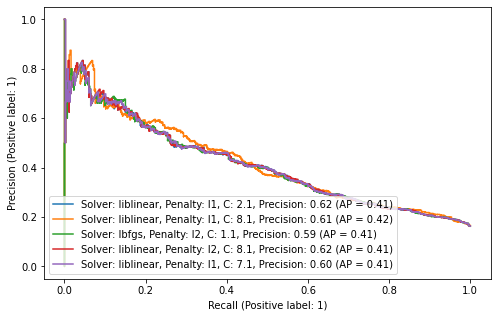

In [80]:
#Compare top 5 models -> ROC, PR (same logreg but different parameters for comparison)

fig, ax = plt.subplots(figsize=(8, 5))
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import PrecisionRecallDisplay, precision_score

best_df = score_df[:5]
for b in range(len(best_df)):
    sub_gm = pf.filter_by_genes(int(best_df['param_ndeg'].values[b]), 'C', de_genes, logcpm)
    
    #train model on all parameter combs -> 
    #pars with best mean cross val score are selected, and re-fitted to entire dataset to learn weights
    X_train, X_test, y_train, y_test = train_test_split(sub_gm, meta['adj_plq'], test_size=0.33, random_state=1)
    model = LogisticRegression(max_iter=1000, solver = best_df['param_solver'].values[b],
    penalty=best_df['param_penalty'].values[b], C=best_df['param_C'].values[b]) 
    model.fit(X_train, y_train) #modifies model in place
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    legend_label = f'Solver: {best_df["param_solver"].values[b]}, Penalty: {best_df["param_penalty"].values[b]}, C: {best_df["param_C"].values[b]}, Precision: {precision:.2f}'

    disp = PrecisionRecallDisplay.from_estimator(
        model, X_test, y_test, name=legend_label, pos_label=1, ax=ax)

plt.show()

In [321]:
#Random under sampling ---> leads to loss of precision, gain of recall due to fewer negative training points -> avoid
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler()# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X_train, y_train)
print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_rus))

Original dataset shape: Counter({0: 4725, 1: 847})
Resample dataset shape Counter({0: 847, 1: 847})


In [322]:
#Fit model and predict
model = LogisticRegression(max_iter=1000, penalty='l2').fit(x_rus, y_rus)
pred = model.predict(X_test) 
pred_prob = model.predict_proba(X_test)
true = y_test.values
pf.report_metrics(true, pred, pred_prob)

TOTAL ACCURACY (#correct predictions/#total predictions) = 0.663 , 1821 of 2745
ACCURACY (#correct predictions/#total true non-plaque) non-plaque = 0.666 , 1532 of 2302
ACCURACY (#correct predictions/#total true plaque) plaque = 0.65 , 289 of 443
PRECISION (TP/TP+FP) non-plaque = 0.909
PRECISION (TP/TP+FP) plaque= 0.273
RECALL (TP/TP+FN) Non-plaque = 0.666
RECALL (TP/TP+FN) plaque = 0.652
F1 SCORE (2*(Pre/Pre+Rec)) non-plaque = 0.768
F1 SCORE (2*(Pre/Pre+Rec)) plaque = 0.385
TRUE POSITIVE RATE (TP/TP+FN) non-plaque = 0.666
TRUE POSITIVE RATE (TP/TP+FN) plaque = 0.652
FALSE POSITIVE RATE (FP/FP+TN) non-plaque  = 0.348
FALSE POSITIVE RATE (FP/FP+TN) plaque = 0.334
ROC AUC non-plaque = 0.727
ROC AUC plaque = 0.727


In [323]:
#Under sampling approach -> NearMiss -> undersample by selecting 
#over-represented class points based on proximity to undersampled class
from imblearn.under_sampling import NearMiss
from collections import Counter

nm = NearMiss(version=3)
x_nm, y_nm = nm.fit_resample(X_train, y_train)
print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_nm))


Original dataset shape: Counter({0: 4725, 1: 847})
Resample dataset shape Counter({0: 847, 1: 847})


In [324]:
#Fit model and predict
model = LogisticRegression(max_iter=1000, penalty='l2').fit(x_nm, y_nm)
pred = model.predict(X_test) 
pred_prob = model.predict_proba(X_test)
true = y_test.values
pf.report_metrics(true, pred, pred_prob)

TOTAL ACCURACY (#correct predictions/#total predictions) = 0.561 , 1539 of 2745
ACCURACY (#correct predictions/#total true non-plaque) non-plaque = 0.556 , 1281 of 2302
ACCURACY (#correct predictions/#total true plaque) plaque = 0.58 , 258 of 443
PRECISION (TP/TP+FP) non-plaque = 0.874
PRECISION (TP/TP+FP) plaque= 0.202
RECALL (TP/TP+FN) Non-plaque = 0.556
RECALL (TP/TP+FN) plaque = 0.582
F1 SCORE (2*(Pre/Pre+Rec)) non-plaque = 0.68
F1 SCORE (2*(Pre/Pre+Rec)) plaque = 0.3
TRUE POSITIVE RATE (TP/TP+FN) non-plaque = 0.556
TRUE POSITIVE RATE (TP/TP+FN) plaque = 0.582
FALSE POSITIVE RATE (FP/FP+TN) non-plaque  = 0.418
FALSE POSITIVE RATE (FP/FP+TN) plaque = 0.444
ROC AUC non-plaque = 0.578
ROC AUC plaque = 0.578


In [64]:
# naive random over sampling
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(sampling_strategy='minority')
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape: Counter({0: 4715, 1: 857})
Resample dataset shape Counter({0: 4715, 1: 4715})


In [65]:
#Fit model and predict
model = LogisticRegression(max_iter=1000, penalty='l2').fit(X_ros, y_ros)
pred = model.predict(X_test) 
pred_prob = model.predict_proba(X_test)
true = y_test.values
pf.report_metrics(true, pred, pred_prob)

TOTAL ACCURACY (#correct predictions/#total predictions) = 0.697 , 1912 of 2745
ACCURACY (#correct predictions/#total true non-plaque) non-plaque = 0.705 , 1631 of 2312
ACCURACY (#correct predictions/#total true plaque) plaque = 0.65 , 281 of 433
PRECISION (TP/TP+FP) non-plaque = 0.915
PRECISION (TP/TP+FP) plaque= 0.292
RECALL (TP/TP+FN) Non-plaque = 0.705
RECALL (TP/TP+FN) plaque = 0.649
F1 SCORE (2*(Pre/Pre+Rec)) non-plaque = 0.797
F1 SCORE (2*(Pre/Pre+Rec)) plaque = 0.403
TRUE POSITIVE RATE (TP/TP+FN) non-plaque = 0.705
TRUE POSITIVE RATE (TP/TP+FN) plaque = 0.649
FALSE POSITIVE RATE (FP/FP+TN) non-plaque  = 0.351
FALSE POSITIVE RATE (FP/FP+TN) plaque = 0.295
ROC AUC non-plaque = 0.751
ROC AUC plaque = 0.751


In [67]:
# SMOTE oversampling
from imblearn.over_sampling import SMOTE, ADASYN
X_smote, y_smote = SMOTE().fit_resample(X_train, y_train)
print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

#Fit model and predict
model = LogisticRegression(max_iter=1000, penalty='l2').fit(X_smote, y_smote)
pred = model.predict(X_test) 
pred_prob = model.predict_proba(X_test)
true = y_test.values
pf.report_metrics(true, pred, pred_prob)

Original dataset shape: Counter({0: 4715, 1: 857})
Resample dataset shape Counter({0: 4715, 1: 4715})
TOTAL ACCURACY (#correct predictions/#total predictions) = 0.707 , 1941 of 2745
ACCURACY (#correct predictions/#total true non-plaque) non-plaque = 0.724 , 1673 of 2312
ACCURACY (#correct predictions/#total true plaque) plaque = 0.62 , 269 of 433
PRECISION (TP/TP+FP) non-plaque = 0.911
PRECISION (TP/TP+FP) plaque= 0.296
RECALL (TP/TP+FN) Non-plaque = 0.724
RECALL (TP/TP+FN) plaque = 0.621
F1 SCORE (2*(Pre/Pre+Rec)) non-plaque = 0.806
F1 SCORE (2*(Pre/Pre+Rec)) plaque = 0.401
TRUE POSITIVE RATE (TP/TP+FN) non-plaque = 0.724
TRUE POSITIVE RATE (TP/TP+FN) plaque = 0.621
FALSE POSITIVE RATE (FP/FP+TN) non-plaque  = 0.379
FALSE POSITIVE RATE (FP/FP+TN) plaque = 0.276
ROC AUC non-plaque = 0.75
ROC AUC plaque = 0.75


In [68]:
# ADASYN oversampling
from imblearn.over_sampling import SMOTE, ADASYN
X_smote, y_smote = ADASYN().fit_resample(X_train, y_train)
print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

#Fit model and predict
model = LogisticRegression(max_iter=1000, penalty='l2').fit(X_smote, y_smote)
pred = model.predict(X_test) 
pred_prob = model.predict_proba(X_test)
true = y_test.values
pf.report_metrics(true, pred, pred_prob)


Original dataset shape: Counter({0: 4715, 1: 857})
Resample dataset shape Counter({0: 4715, 1: 4711})
TOTAL ACCURACY (#correct predictions/#total predictions) = 0.69 , 1893 of 2745
ACCURACY (#correct predictions/#total true non-plaque) non-plaque = 0.701 , 1620 of 2312
ACCURACY (#correct predictions/#total true plaque) plaque = 0.63 , 273 of 433
PRECISION (TP/TP+FP) non-plaque = 0.91
PRECISION (TP/TP+FP) plaque= 0.283
RECALL (TP/TP+FN) Non-plaque = 0.701
RECALL (TP/TP+FN) plaque = 0.63
F1 SCORE (2*(Pre/Pre+Rec)) non-plaque = 0.792
F1 SCORE (2*(Pre/Pre+Rec)) plaque = 0.391
TRUE POSITIVE RATE (TP/TP+FN) non-plaque = 0.701
TRUE POSITIVE RATE (TP/TP+FN) plaque = 0.63
FALSE POSITIVE RATE (FP/FP+TN) non-plaque  = 0.37
FALSE POSITIVE RATE (FP/FP+TN) plaque = 0.299
ROC AUC non-plaque = 0.74
ROC AUC plaque = 0.74


In [70]:
# combine over and undersampling 
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

ros = SMOTE(sampling_strategy='minority')# fit predictor and target variable
rus = RandomUnderSampler(replacement=False)# fit predictor and target variable
pipeline = Pipeline(steps=[('ros', ros), ('rus', rus)])
X_mix, y_mix = pipeline.fit_resample(X_train, y_train)
print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_mix))

#Fit model and predict
model = LogisticRegression(max_iter=1000, penalty='l2').fit(X_mix, y_mix)
pred = model.predict(X_test) 
pred_prob = model.predict_proba(X_test)
true = y_test.values
pf.report_metrics(true, pred, pred_prob)


Original dataset shape: Counter({0: 4715, 1: 857})
Resample dataset shape Counter({0: 4715, 1: 4715})
TOTAL ACCURACY (#correct predictions/#total predictions) = 0.711 , 1951 of 2745
ACCURACY (#correct predictions/#total true non-plaque) non-plaque = 0.726 , 1678 of 2312
ACCURACY (#correct predictions/#total true plaque) plaque = 0.63 , 273 of 433
PRECISION (TP/TP+FP) non-plaque = 0.913
PRECISION (TP/TP+FP) plaque= 0.301
RECALL (TP/TP+FN) Non-plaque = 0.726
RECALL (TP/TP+FN) plaque = 0.63
F1 SCORE (2*(Pre/Pre+Rec)) non-plaque = 0.809
F1 SCORE (2*(Pre/Pre+Rec)) plaque = 0.407
TRUE POSITIVE RATE (TP/TP+FN) non-plaque = 0.726
TRUE POSITIVE RATE (TP/TP+FN) plaque = 0.63
FALSE POSITIVE RATE (FP/FP+TN) non-plaque  = 0.37
FALSE POSITIVE RATE (FP/FP+TN) plaque = 0.274
ROC AUC non-plaque = 0.748
ROC AUC plaque = 0.748


# Build SVM classifier



In [8]:
# classify plaque or no plaque spots based gene expression
#----------------------------------------------------------------------
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC


#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(sub_gm, meta['adj_plq'], test_size=0.33)

print(f"Training matrix shape =  {X_train.shape}, Test matrix shape =  {X_test.shape}")
print(f"Training label shape = {y_train.shape}, Test label shape =  {y_test.shape}")

#run CV and take mean of weights across each fold to get best model
svc_classifier = SVC(kernel='rbf', C=1, degree=5, gamma='scale', coef0=0, probability=True)

# Create a pipeline with StandardScaler and SVC
model = make_pipeline(StandardScaler(), svc_classifier)

# Now you can fit, predict, etc. with this pipeline
print(model)

Training matrix shape =  (5572, 50), Test matrix shape =  (2745, 50)
Training label shape = (5572,), Test label shape =  (2745,)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, coef0=0, degree=5, probability=True))])


In [249]:
#Fit model and predict
model.fit(X_train, y_train) #modifies model in place
pred = model.predict(X_test) 
pred_prob = model.predict_proba(X_test)
true = y_test.values
pf.report_metrics(true, pred, pred_prob)

TOTAL ACCURACY (#correct predictions/#total predictions) = 0.85 , 2334 of 2745
ACCURACY (#correct predictions/#total true non-plaque) non-plaque = 1.0 , 2331 of 2332
ACCURACY (#correct predictions/#total true plaque) plaque = 0.01 , 3 of 413
PRECISION (TP/TP+FP) non-plaque = 0.85
PRECISION (TP/TP+FP) plaque= 0.75
RECALL (TP/TP+FN) Non-plaque = 1.0
RECALL (TP/TP+FN) plaque = 0.007
F1 SCORE (2*(Pre/Pre+Rec)) non-plaque = 0.919
F1 SCORE (2*(Pre/Pre+Rec)) plaque = 0.014
TRUE POSITIVE RATE (TP/TP+FN) non-plaque = 1.0
TRUE POSITIVE RATE (TP/TP+FN) plaque = 0.007
FALSE POSITIVE RATE (FP/FP+TN) non-plaque  = 0.993
FALSE POSITIVE RATE (FP/FP+TN) plaque = 0.0
ROC AUC non-plaque = 0.63
ROC AUC plaque = 0.63


In [69]:
#Get CIs of model performance with CV
pf.model_cvs(model, X_train, y_train, 5)

Accuracy (#correct predictions/#total predictions): 0.855 (+/- 0.004)
[0.84753363 0.85560538 0.85547576 0.8572711  0.86086176]
Plaque precision (TP/TP+FP): 0.601 (+/- 0.108)
[0.4137931  0.61111111 0.625      0.60714286 0.75      ]
Plaque recall (TP/TP+FN): 0.079 (+/- 0.016)
[0.07272727 0.06666667 0.06060606 0.1030303  0.09090909]
Plaque f1 (2*(Pre/Pre+Rec)): 0.139 (+/- 0.026)
[0.12371134 0.12021858 0.11049724 0.1761658  0.16216216]
ROC AUC: 0.692 (+/- 0.018)
[0.70885486 0.71811164 0.68493789 0.67111154 0.67824504]


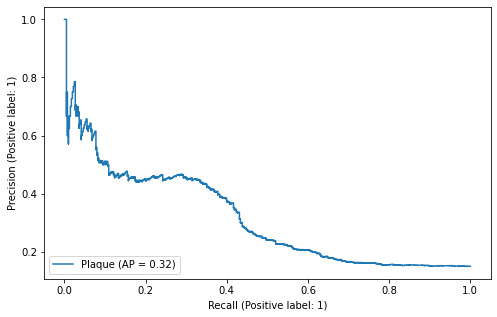

In [250]:
from sklearn.metrics import PrecisionRecallDisplay
fig, ax = plt.subplots(figsize=(8, 5))
PrecisionRecallDisplay.from_estimator(
    model, X_test, y_test, name="Plaque", pos_label=1, ax=ax)
plt.show()

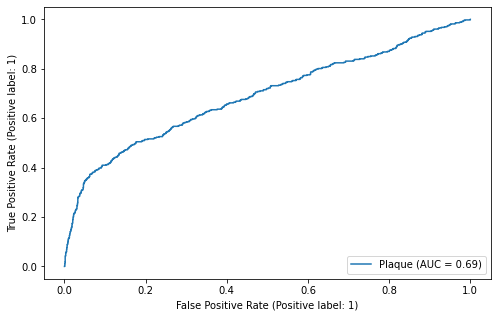

In [59]:
from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots(figsize=(8, 5))
RocCurveDisplay.from_estimator(
    model, X_test, y_test, name="Plaque", pos_label=1, ax=ax)
plt.show()

In [66]:
from imblearn.over_sampling import SMOTE, ADASYN
X_smote, y_smote = SMOTE().fit_resample(X_train, y_train)
print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))


#run CV and take mean of weights across each fold to get best model
svc_classifier = SVC(kernel='rbf', C=1, degree=5, gamma='scale', coef0=0, probability=True)

# Create a pipeline with StandardScaler and SVC
model = make_pipeline(StandardScaler(), svc_classifier)

# Now you can fit, predict, etc. with this pipeline
print(model)

#Fit model and predict
model.fit(X_smote, y_smote) #modifies model in place
pred = model.predict(X_test) 
pred_prob = model.predict_proba(X_test)
true = y_test.values
pf.report_metrics(true, pred, pred_prob)

Original dataset shape: Counter({0: 4714, 1: 858})
Resample dataset shape Counter({0: 4714, 1: 4714})
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, coef0=0, degree=5, probability=True))])
TOTAL ACCURACY (#correct predictions/#total predictions) = 0.766 , 2104 of 2745
ACCURACY (#correct predictions/#total true non-plaque) non-plaque = 0.812 , 1879 of 2313
ACCURACY (#correct predictions/#total true plaque) plaque = 0.52 , 225 of 432
PRECISION (TP/TP+FP) non-plaque = 0.901
PRECISION (TP/TP+FP) plaque= 0.341
RECALL (TP/TP+FN) Non-plaque = 0.812
RECALL (TP/TP+FN) plaque = 0.521
F1 SCORE (2*(Pre/Pre+Rec)) non-plaque = 0.854
F1 SCORE (2*(Pre/Pre+Rec)) plaque = 0.412
TRUE POSITIVE RATE (TP/TP+FN) non-plaque = 0.812
TRUE POSITIVE RATE (TP/TP+FN) plaque = 0.521
FALSE POSITIVE RATE (FP/FP+TN) non-plaque  = 0.479
FALSE POSITIVE RATE (FP/FP+TN) plaque = 0.188
ROC AUC non-plaque = 0.728
ROC AUC plaque = 0.728


In [244]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(sub_gm, meta['adj_plq'], test_size=0.33)

print(f"Training matrix shape =  {X_train.shape}, Test matrix shape =  {X_test.shape}")
print(f"Training label shape = {y_train.shape}, Test label shape =  {y_test.shape}")


Training matrix shape =  (5572, 5), Test matrix shape =  (2745, 5)
Training label shape = (5572,), Test label shape =  (2745,)


In [11]:
#Do hyperparameter search

#Define model
svc_classifier = SVC(gamma='scale', coef0=0, probability=True)
model = make_pipeline(StandardScaler(), svc_classifier)

scoring = ('precision', 'recall', 'roc_auc')

#Define grid search parameters
from sklearn.model_selection import GridSearchCV 
parameters = [{'kernel': ['rbf'], 'C': list(np.arange(0.1, 10, 1))},
            {'kernel': ['poly'], 'C': list(np.arange(0.1, 10, 1)), 'degree': list(np.arange(2,5,1))}]


# #Define external parameters to loop over
# #n DE genes
# n_de = np.arange(5,200, 20)
# #n PCs
# n_pc = (np.geomspace(2, 50, 10).astype(int))[1:]
# n_de, n_pc

#parameter types?


#weighted precision + recall? 

In [23]:
par_list = ['svc__kernel', 'svc__C', 'svc__degree']
par_list = ['param_' + i for i in par_list]
parameters={'svc__kernel': ['rbf'], 'svc__C': [1], 'svc__degree':[1]}
par_list

['param_svc__kernel', 'param_svc__C', 'param_svc__degree']

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, roc_auc_score


#Define your data
X,y = X_train, y_train #sub_gm, meta['adj_plq']
n_cv = 3

# Define your model
svc_classifier = SVC(gamma='scale', coef0=0, probability=True)
model = make_pipeline(StandardScaler(), svc_classifier)

score_df = pd.DataFrame()
# Manually create outer folds
kf = KFold(n_splits=n_cv, shuffle=True)
best_params_each_fold = []
store_test, store_train = list(range(n_cv)), list(range(n_cv))
count=0
for train_index, test_index in kf.split(X):
    Xi_train, Xi_test = np.asarray(X)[train_index], np.asarray(X)[test_index]
    yi_train, yi_test = np.asarray(y)[train_index], np.asarray(y)[test_index]
    store_train[count] = Xi_train, yi_train
    store_test[count] = Xi_test, yi_test
    count+=1

    #INNER LOOP -> define model and parameter grid to perform inner CV with
    # Note: 'svc__kernel' specifies the 'kernel' parameter of the 'SVC' step in the pipeline
    model_grid = GridSearchCV(model, param_grid=parameters, refit = 'precision', 
                              scoring=scoring, cv=n_cv, n_jobs = n_cv)
    model_grid.fit(Xi_train, yi_train)

    # Store best parameters
    cv_results = pd.DataFrame(model_grid.cv_results_)
    curr = cv_results[par_list + ["mean_test_precision", "std_test_precision",'mean_test_recall', 'std_test_recall']] #change to weighted mean or precision + recall?
    score_df = pd.concat([score_df, curr])
    
#Find the best model
grop = score_df.groupby(par_list).mean() #find weighted comb of precision and recall? 
max_index = grop['mean_test_precision'].idxmax()
max_row = grop.loc[[max_index]]
print('Best Model:')
print(max_row)

# Lists to store metrics for each fold
precisions = []
recalls = []
roc_aucs = []
model_li = []
    
#Evaluate best model in outer loop 
for x,s in enumerate(store_test):
    max_index = grop['mean_test_precision'].idxmax()  # Get the index of the max value
    kernel, C_value, degree = max_index  # Extract kernel and C values from the MultiIndex
    # Reinitialize or set parameters for your SVC model
    best_model = SVC(kernel=kernel, C=C_value, degree=degree,gamma='scale', coef0=0, probability=True)
    best_model.fit(store_train[x][0], store_train[x][1])

    # Make predictions
    y_pred = best_model.predict(s[0])
    y_proba = best_model.predict_proba(s[0])[:, 1] # Probability for the positive class

    # Calculate precision and recall
    precision = precision_score(s[1], y_pred)
    recall = recall_score(s[1], y_pred)

    # Calculate ROC-AUC
    roc_auc = roc_auc_score(s[1], y_proba)
    
    # Store metrics
    precisions.append(precision)
    recalls.append(recall)
    roc_aucs.append(roc_auc)
    
    model_li.append(best_model)

# Calculate and print mean and standard deviation for each metric
print(f"Precision: {precisions}, Mean = {np.mean(precisions):.2f}, Std = {np.std(precisions):.2f}")
print(f"Recall: {recalls}, Mean = {np.mean(recalls):.2f}, Std = {np.std(recalls):.2f}")
print(f"ROC-AUC: {roc_aucs},  Mean = {np.mean(roc_aucs):.2f}, Std = {np.std(roc_aucs):.2f}")

Best Model:
                                                  mean_test_precision  \
param_svc__kernel param_svc__C param_svc__degree                        
rbf               1            1                             0.607468   

                                                  std_test_precision  \
param_svc__kernel param_svc__C param_svc__degree                       
rbf               1            1                            0.044105   

                                                  mean_test_recall  \
param_svc__kernel param_svc__C param_svc__degree                     
rbf               1            1                          0.073026   

                                                  std_test_recall  
param_svc__kernel param_svc__C param_svc__degree                   
rbf               1            1                         0.027014  
Precision: [0.8, 0.5357142857142857, 0.6], Mean = 0.65, Std = 0.11
Recall: [0.014285714285714285, 0.05415162454873646, 0.039087947882736

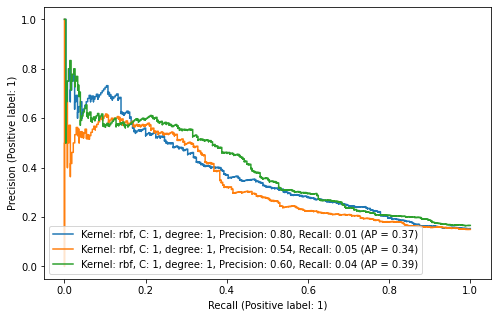

Precision: [0.8, 0.5357142857142857, 0.6, 0.8, 0.8, 0.8, 0.8, 0.5357142857142857, 0.6], Mean = 0.70, Std = 0.12
Recall: [0.014285714285714285, 0.05415162454873646, 0.03908794788273615, 0.014285714285714285, 0.014285714285714285, 0.014285714285714285, 0.014285714285714285, 0.05415162454873646, 0.03908794788273615], Mean = 0.03, Std = 0.02
ROC-AUC: [0.7091877150099584, 0.6751108166156377, 0.7021897656824629, 0.7091888466413182, 0.7091888466413182, 0.7091877150099584, 0.7091888466413182, 0.6751085317369647, 0.7021939686876116],  Mean = 0.70, Std = 0.01


In [28]:
#Compare performance of best model across each outer loop

fig, ax = plt.subplots(figsize=(8, 5))
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import PrecisionRecallDisplay, precision_score

for x,s in enumerate(store_test):
    max_index = grop['mean_test_precision'].idxmax()  # Get the index of the max value
    kernel, C_value, degree = max_index  # Extract kernel and C values from the MultiIndex
    # Reinitialize or set parameters for your SVC model
    best_model = SVC(kernel=kernel, C=C_value, degree=degree,gamma='scale', coef0=0, probability=True)
    best_model.fit(store_train[x][0], store_train[x][1])

    # Make predictions
    y_pred = best_model.predict(s[0])
    y_proba = best_model.predict_proba(s[0])[:, 1] # Probability for the positive class

    # Calculate precision and recall
    precision = precision_score(s[1], y_pred)
    recall = recall_score(s[1], y_pred)

    # Calculate ROC-AUC
    roc_auc = roc_auc_score(s[1], y_proba)
    
    # Store metrics
    precisions.append(precision)
    recalls.append(recall)
    roc_aucs.append(roc_auc)
    
    model_li.append(best_model)
    
    legend_label = f'Kernel: {kernel}, C: {C_value}, degree: {degree}, Precision: {precision:.2f}, Recall: {recall:.2f}'

    disp = PrecisionRecallDisplay.from_estimator(
        best_model, s[0], s[1], name=legend_label, pos_label=1, ax=ax)

plt.show()

# Calculate and print mean and standard deviation for each metric
print(f"Precision: {precisions}, Mean = {np.mean(precisions):.2f}, Std = {np.std(precisions):.2f}")
print(f"Recall: {recalls}, Mean = {np.mean(recalls):.2f}, Std = {np.std(recalls):.2f}")
print(f"ROC-AUC: {roc_aucs},  Mean = {np.mean(roc_aucs):.2f}, Std = {np.std(roc_aucs):.2f}")

# Build random forest classifier

# Build decision tree classifier